In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("dataset.csv")

In [3]:
df

,rank,date,artist,title,streams,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,uri,duration_ms,time_signature
0,1,2017-01-01,Migos,Bad and Boujee (feat. Lil Uzi Vert),1371493,0.927,0.665,11.0,-5.313,1.0,0.2440,0.0610,0.000000,0.1230,0.175,127.076,spotify:track:4Km5HrUvYTaSUfiSGPJeQR,343150.0,4.0
1,2,2017-01-01,Drake,Fake Love,1180074,0.928,0.481,9.0,-9.350,0.0,0.2870,0.1050,0.000000,0.1760,0.613,134.007,spotify:track:343YBumqHu19cGoGARUTsd,210937.0,4.0
2,3,2017-01-01,The Weeknd,Starboy,1064351,0.679,0.587,7.0,-7.015,1.0,0.2760,0.1410,0.000006,0.1370,0.486,186.003,spotify:track:7MXVkk9YMctZqd1Srtv4MB,230453.0,4.0
3,4,2017-01-01,The Chainsmokers,Closer,1010492,0.748,0.524,8.0,-5.599,1.0,0.0338,0.4140,0.000000,0.1110,0.661,95.010,spotify:track:7BKLCZ1jbUBVqRi2FVlTVw,244960.0,4.0
4,5,2017-01-01,Rae Sremmurd,Black Beatles,874289,0.794,0.632,0.0,-6.163,1.0,0.0649,0.1420,0.000000,0.1280,0.355,145.926,spotify:track:6fujklziTHa8uoM5OQSfIo,291893.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238979,196,2020-04-12,XXXTENTACION,Hope,177711,0.592,0.457,9.0,-6.081,0.0,0.0603,0.6610,0.000331,0.1460,0.225,146.040,spotify:track:2ZRo7axmMPeSVUvDbGkJah,110886.0,4.0
238980,197,2020-04-12,The Weeknd,Hardest To Love,177686,0.467,0.608,10.0,-7.847,1.0,0.0707,0.0909,0.000088,0.1250,0.108,80.957,spotify:track:6kWxIqQDsKFYCJGbU4AjCX,211400.0,4.0
238981,198,2020-04-12,Khalid,Location,176921,0.736,0.449,1.0,-11.462,0.0,0.4250,0.3300,0.000162,0.0898,0.326,80.126,spotify:track:152lZdxL1OR0ZMW6KquMif,219080.0,4.0
238982,199,2020-04-12,Lewis Capaldi,Bruises,175654,0.736,0.308,4.0,-7.830,1.0,0.0677,0.9460,0.000000,0.1860,0.361,111.202,spotify:track:4Of7rzpRpV1mWRbhp5rAqG,220492.0,4.0


In [4]:
df.dtypes

rank                  int64
date                 object
artist               object
title                object
streams               int64
danceability        float64
energy              float64
key                 float64
loudness            float64
mode                float64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
uri                  object
duration_ms         float64
time_signature      float64
dtype: object

## Create songs df

In [5]:
CONST_COLS = ['artist', 'title', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'uri',
       'duration_ms', 'time_signature']

In [6]:
df_grp_songs = df[CONST_COLS].copy().drop_duplicates(subset = 'uri').reset_index(drop = True)
gb = df.groupby('uri').agg({
    'uri':'count',
    'rank':['mean', 'max', 'min', 'median'],
    'streams':['mean', 'max', 'min', 'median','sum'],
    'date':['first', 'last']})
gb.columns = [x[0] + "_" + x[1] for x in gb.columns]
df_grp_songs = df_grp_songs.join(gb, on = 'uri').rename(columns = {'uri_count':'ndays', 'rank_max':'lowest_rank', 'rank_min':'highest_rank', 'date_first':'first_date', 'date_last':'last_date'})

In [7]:
df_grp_songs.columns

Index(['artist', 'title', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'uri', 'duration_ms', 'time_signature', 'ndays',
       'rank_mean', 'lowest_rank', 'highest_rank', 'rank_median',
       'streams_mean', 'streams_max', 'streams_min', 'streams_median',
       'streams_sum', 'first_date', 'last_date'],
      dtype='object')

In [8]:
df_grp_songs.head()

,artist,title,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,...,lowest_rank,highest_rank,rank_median,streams_mean,streams_max,streams_min,streams_median,streams_sum,first_date,last_date
0,Migos,Bad and Boujee (feat. Lil Uzi Vert),0.927,0.665,11.0,-5.313,1.0,0.2440,0.061,0.000000,...,199.0,1.0,71.0,524603.417249,1823391.0,179173.0,309115.0,225054866.0,2017-01-01,2018-03-11
1,Drake,Fake Love,0.928,0.481,9.0,-9.350,0.0,0.2870,0.105,0.000000,...,200.0,2.0,96.0,422185.048352,1428332.0,170122.0,249886.0,192094197.0,2017-01-01,2018-06-29
2,The Weeknd,Starboy,0.679,0.587,7.0,-7.015,1.0,0.2760,0.141,0.000006,...,200.0,3.0,101.5,352759.232759,1134858.0,167732.0,248945.0,163680284.0,2017-01-01,2020-03-21
3,The Chainsmokers,Closer,0.748,0.524,8.0,-5.599,1.0,0.0338,0.414,0.000000,...,200.0,4.0,119.0,321925.319030,1010492.0,168921.0,245003.0,172551971.0,2017-01-01,2020-01-01
4,Rae Sremmurd,Black Beatles,0.794,0.632,0.0,-6.163,1.0,0.0649,0.142,0.000000,...,196.0,5.0,101.0,349239.462500,874289.0,153349.0,267720.0,83817471.0,2017-01-01,2017-09-24


In [9]:
# df_grp_songs.to_csv("grouped_songs_dataset.csv", index = False)

In [10]:
df_grp_songs.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,ndays,rank_mean,lowest_rank,highest_rank,rank_median,streams_mean,streams_max,streams_min,streams_median,streams_sum
count,4899.000000,4899.000000,4899.000000,4899.000000,4899.000000,4899.000000,4899.000000,4899.000000,4899.000000,4899.000000,...,4899.000000,4899.000000,4899.000000,4899.000000,4899.000000,4.899000e+03,4.899000e+03,4.899000e+03,4.899000e+03,4.899000e+03
mean,0.676174,0.616292,5.184527,-6.767565,0.599918,0.150149,0.223066,0.014391,0.183563,0.455199,...,48.210655,128.506344,178.095938,84.139212,127.299857,3.149820e+05,5.878810e+05,2.166991e+05,2.880777e+05,1.916295e+07
std,0.151767,0.172684,3.678904,2.709110,0.489965,0.132387,0.248003,0.085456,0.139626,0.219083,...,108.815695,37.082636,28.373669,59.073991,41.461886,1.203093e+05,5.726852e+05,5.393022e+04,9.856182e+04,5.101077e+07
min,0.148000,0.013700,0.000000,-34.475000,0.000000,0.022900,0.000002,0.000000,0.021500,0.026200,...,1.000000,3.142857,4.000000,1.000000,1.000000,1.308610e+05,1.330400e+05,1.224880e+05,1.308610e+05,1.330400e+05
25%,0.577000,0.510000,1.000000,-7.903500,0.000000,0.046950,0.035300,0.000000,0.099800,0.282000,...,2.000000,101.094963,169.000000,32.000000,96.500000,2.396947e+05,2.706425e+05,1.839590e+05,2.315538e+05,5.050015e+05
50%,0.690000,0.630000,5.000000,-6.320000,1.000000,0.093000,0.125000,0.000000,0.127000,0.447000,...,7.000000,127.250000,189.000000,75.000000,130.000000,2.909225e+05,3.874230e+05,2.073970e+05,2.733820e+05,2.019487e+06
75%,0.787000,0.741000,8.000000,-4.996000,1.000000,0.230000,0.327000,0.000028,0.219000,0.618000,...,39.000000,157.000000,198.000000,133.500000,160.000000,3.572739e+05,6.391410e+05,2.396360e+05,3.238600e+05,1.263219e+07
max,0.980000,0.996000,11.000000,0.175000,1.000000,0.966000,0.994000,0.956000,0.963000,0.980000,...,1177.000000,200.000000,200.000000,200.000000,200.000000,2.072917e+06,5.749019e+06,1.019953e+06,2.110671e+06,6.510341e+08


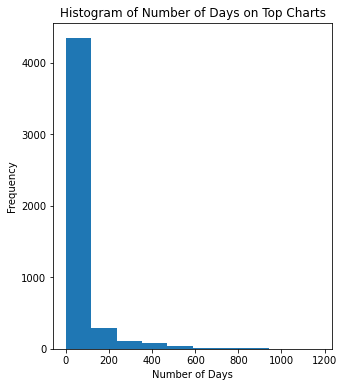

In [117]:
plt.figure(figsize = (5,6))

plt.hist(df_grp_songs.ndays)
plt.title('Histogram of Number of Days on Top Charts')
plt.ylabel("Frequency")
plt.xlabel("Number of Days")
plt.show()

In [33]:
df_grp_songs.sort_values(by = 'ndays', ascending = False).loc[:, ['artist', 'title', 'ndays']].head(20)

,artist,title,ndays
59,Travis Scott,goosebumps,1177.0
532,Lil Uzi Vert,XO TOUR Llif3,1154.0
114,Post Malone,Congratulations,1093.0
225,Khalid,Location,989.0
1069,XXXTENTACION,Jocelyn Flores,960.0
1142,Post Malone,rockstar,940.0
1149,Post Malone,I Fall Apart,938.0
1070,XXXTENTACION,Fuck Love (feat. Trippie Redd),937.0
541,Kendrick Lamar,HUMBLE.,928.0
766,Lauv,I Like Me Better,916.0


In [26]:
len(df_grp_songs)

4900

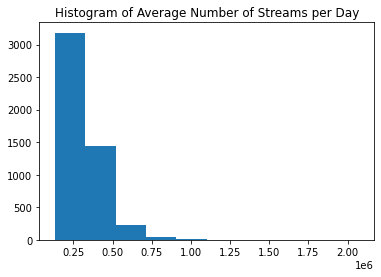

In [25]:
plt.hist(df_grp_songs.streams_mean)
plt.title('Histogram of Average Number of Streams per Day')
plt.show()

In [36]:
df_grp_songs.streams_mean.describe()

count    4.899000e+03
mean     3.149820e+05
std      1.203093e+05
min      1.308610e+05
25%      2.396947e+05
50%      2.909225e+05
75%      3.572739e+05
max      2.072917e+06
Name: streams_mean, dtype: float64

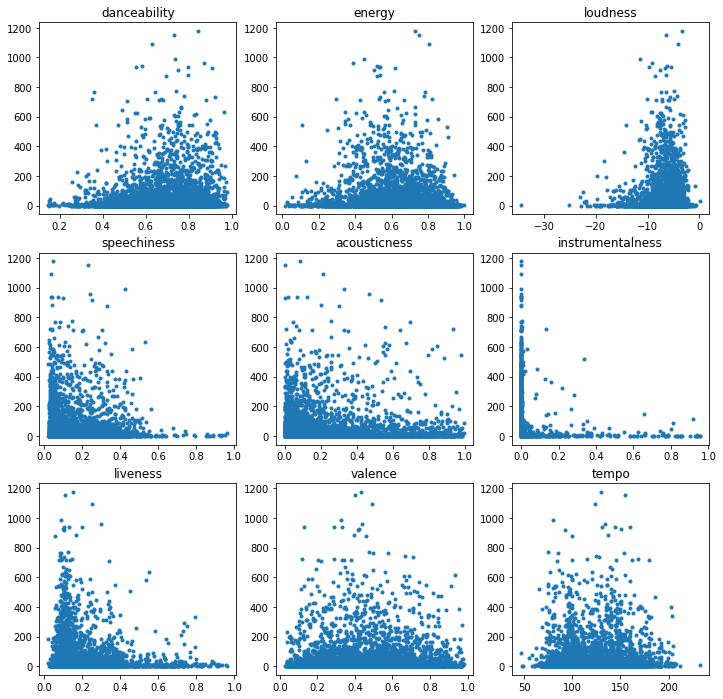

In [12]:
CONT_COLS = ['danceability', 'energy', 'loudness',
       'speechiness', 'acousticness', 'instrumentalness', 
             'liveness','valence', 'tempo']
fig, ax = plt.subplots(3,3, figsize = (12,12))
for i, colname in enumerate(CONT_COLS):
    row, col = i//3, i%3
    ax[row,col].plot(df_grp_songs[colname], df_grp_songs['ndays'], '.')
    ax[row,col].set_title(colname)
plt.show()

In [41]:
df_grp_songs.columns

Index(['artist', 'title', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'uri', 'duration_ms', 'time_signature', 'ndays',
       'rank_mean', 'lowest_rank', 'highest_rank', 'rank_median',
       'streams_mean', 'streams_max', 'streams_min', 'streams_median',
       'streams_sum', 'first_date', 'last_date'],
      dtype='object')

In [38]:
CONT_COLS = ['danceability', 'energy', 'loudness',
       'speechiness', 'acousticness', 'instrumentalness', 
             'liveness','valence', 'tempo']
def af_plots(target_col):
    fig, ax = plt.subplots(3,3, figsize = (12,12))
    for i, colname in enumerate(CONT_COLS):
        row, col = i//3, i%3
        ax[row,col].plot(df_grp_songs[colname], df_grp_songs[target_col], '.')
        ax[row,col].set_title(colname)
    plt.show()

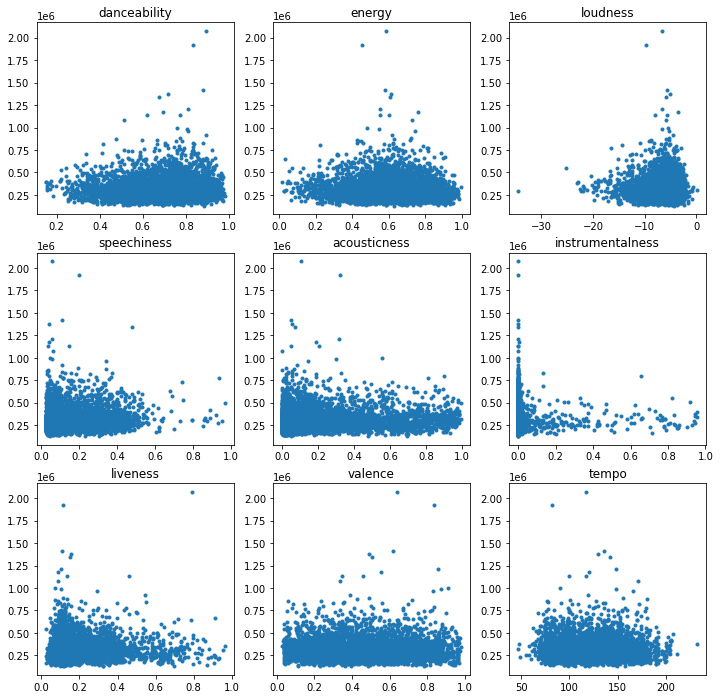

In [107]:
af_plots('streams_mean')

In [69]:
df['date1'] = pd.to_datetime(df['date']).dt.strftime('%Y-%m')
df_gb_month = df.groupby('date1')[CONT_COLS].mean()

In [70]:
df_gb_month

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
date1,,,,,,,,,
2017-01,0.685028,0.611649,-6.664733,0.146051,0.202181,0.008510,0.162219,0.445494,120.397466
2017-02,0.688805,0.608902,-6.618574,0.152157,0.205938,0.007769,0.161476,0.426770,121.502076
2017-03,0.696631,0.595437,-6.676328,0.150231,0.204511,0.007824,0.161794,0.432271,120.124645
2017-04,0.707780,0.599622,-6.767773,0.154183,0.174264,0.007058,0.174119,0.438022,121.504518
2017-05,0.709444,0.602702,-6.656012,0.150207,0.172472,0.006617,0.166076,0.452437,121.196648
2017-06,0.716655,0.610555,-6.409041,0.145173,0.167771,0.005387,0.157099,0.460664,121.788534
2017-07,0.715818,0.614689,-6.435837,0.145479,0.169426,0.007609,0.155877,0.461982,120.522981
2017-08,0.722925,0.615406,-6.399280,0.141130,0.162461,0.005543,0.150223,0.460744,120.691915
2017-09,0.730574,0.604761,-6.488724,0.138587,0.173317,0.004389,0.149140,0.463888,120.741374


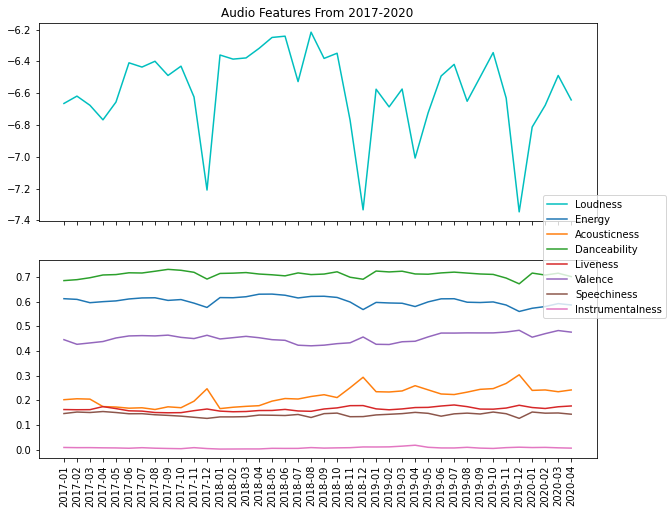

In [94]:
fig, (ax1, ax2) = plt.subplots(nrows = 2, figsize = (10,8), sharex = True)
ax1.plot(df_gb_month.loudness, color = 'c', label = 'Loudness')
ax1.set_title("Audio Features From 2017-2020")

ax2.plot(df_gb_month['energy'], '-', label = 'Energy')
ax2.plot(df_gb_month['acousticness'], '-', label = 'Acousticness')
ax2.plot(df_gb_month['danceability'], '-', label = 'Danceability')
ax2.plot(df_gb_month['liveness'], '-', label = 'Liveness')
ax2.plot(df_gb_month['valence'], '-', label = 'Valence')
ax2.plot(df_gb_month['speechiness'], '-', label = 'Speechiness')
ax2.plot(df_gb_month['instrumentalness'], '-', label = 'Instrumentalness')

plt.xticks(rotation = 90)
fig.legend(loc=7)
plt.show()

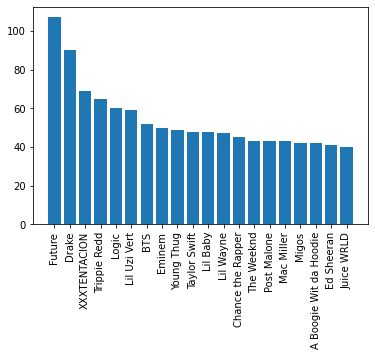

In [105]:
art_cnts = df_grp_songs.artist.value_counts()
plt.bar(art_cnts.index[:20], art_cnts.values[:20])
plt.xticks(rotation = 90)
plt.show()